# Linked Lists 

(ch 10)



## Self-referential Structures

```c
struct node
{
    char data;
    struct list *next;
} a, b, c, d;
```

Commonly used for reading from input and manipulating data of unbounded length (e.g. strings).



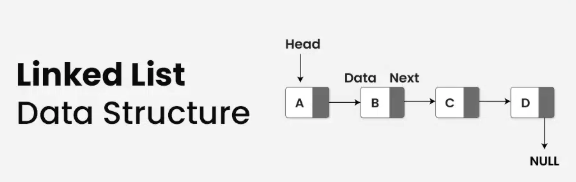

```c
a.data = 'A';
b.data = 'B';
c.data = 'C';
d.data = 'D';
a.next = b.next = c.next = d.next = NULL;
```
Linking the list
```c
a.next = &b;
b.next = &c;
c.next = &d;
```

```c
a.next -> next ->data
```
* is equivalent to:  ```c(*(*a.next).next).data```
* has the value of c



## List definition

```c
typedef char DATA; /*We will use chars in the example*/

struct linked_list
{
    DATA d;
    struct linked_list *next;
};

typedef struct linked_list ELEMENT;
typedef ELEMENT *LINK;
```

## Iterative List Creation

```c
LINK string_to_list()
{
    char s;
    LINK head = NULL, tail = NULL;

    if ((s = getchar()) != EOF)
    {
        head = (ELEMENT *)malloc(sizeof(ELEMENT)); /*Input string is not empty*/
        assert(head != NULL);
        head->d = s;
        tail = head;
        while ((s = getchar()) != EOF)
        { /*insert elements at the end of the list*/
            tail->next = (ELEMENT *)malloc(sizeof(ELEMENT));
            tail = tail->next;
            assert(tail != NULL);
            tail->d = s;
        }
        tail->next = NULL; /*mark the end of the list*/
    }
    return head;
}
```

## Recursive List Creation

```c
LINK string_to_list()
{
    LINK head = NULL;

    if ((s = getchar()) === EOF) /*stopping criteria*/
        return NULL;

    head = (ELEMENT *)malloc(sizeof(ELEMENT));
    assert(head != NULL);
    head->d = s;
    head->next = string_to_list();
    return head;
}
```

## Printing

```c
void print_list(LINK head)
{
    if (head == NULL)
        printf("NULL\n");
    else
    {
        printf("%c", head->d);
        print_list(head->next);
    }
}
```

## Counting
```c
int count(LINK head)
{
    if (head == NULL)
        return 0;
    else
        return (1 + count(head->next));
}

int count_it(LINK head)
{
    int cnt = 0;
    for (; head != NULL; head = head->next)
        ++cnt;
    return cnt;
}
```

## Concatenate Lists

```c
void concatenate(LINK a, LINK b) /*concatenate lists a & b, with list a as the head*/
{
    if (a == NULL)
        a = b;
    else if (a->next == NULL)
        a->next = b;
    else
        concatenate(a->next, b);
}
```


**Where is the bug?**

## Concatenate Lists

```c
void concatenate(LINK *a, LINK b)
{
    if (*a == NULL)
        *a = b;
    else if ((*a)->next == NULL)
        (*a)->next = b;
    else
        concatenate(&((*a)->next), b);
}
```

* a is a pointer (LINK is defined as ELEMENT *), so it's holding the address of a struct linked_list.

* Inside concatenate(), when you do a = b;, you're modifying the local copy of a, not the original pointer passed from main().

## Recursive Deletion of a List

```c
void delete_list(LINK head)
{
    if (head != NULL)
    {
        delete_list(head->next);
        free(head);
    }
}
```


# Implementing other types of  data structures using lists


The concept of a list (i.e.,  combining data and pointers)  opens the door to many other data types:

* Doubly linked lists
* Stacks
* Trees
* General graphs   …

This is the basis of many sophisticated and powerful data structures.




# More efficient representation of unbounded-length data

Down side of the linked-list representation of strings:
* Memory “wasted” on pointers
* Memory is fragmented:  inefficient storage and retrieval.

A  workaround:
* Keep an array of  DATA (eg, chars) in each  ELEMENT (size of array  is subject to optimization)

Can we also improve search time?

  





# Hash tables

Commonly implemented as an array of linked lists (see Wikipedia figure):
* Element values are stored by their keys (according to a hash function).
* Collisions are handled via a linked list (chaining)
* Search, insertion and deletion all take time O(n/m) on average for n elements and m buckets. (wrost case/collisions)




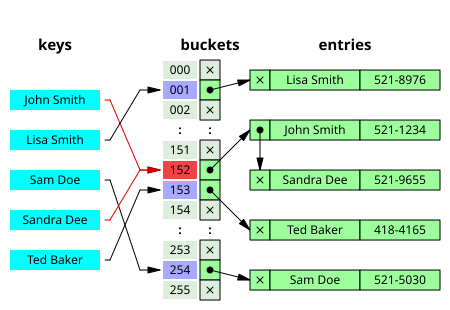